In [130]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import warnings
warnings.simplefilter("ignore") 

In [131]:
base_dir = os.path.dirname(os.path.abspath("..\data"))
path = os.path.join(base_dir, r"data")
os.chdir(path) 

In [132]:
df = pd.read_csv("Cleaned data\data.csv")
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'HUMIDITY', 'WINDSPEED', 'DATE', 'TOTALDEMAND',
       'HOLIDAY', 'MIN', 'MAX', 'SOLAR', 'TEMPAVE', 'RRP', 'FORECASTDEMAND',
       'OUTPUT', 'MONTHDATE', 'WEEKDAY', 'WEEKEND'],
      dtype='object')

## Descriptive Statistics

In [133]:
cols = ['HUMIDITY', 'WINDSPEED', 'TOTALDEMAND', 'SOLAR', 'RRP', 'FORECASTDEMAND', 'OUTPUT', 'TEMPAVE']
describe = df[cols].agg(["min", "max", "mean", "median", "skew"]) #or df.describe(include = 'all')
display(describe)
target_dir = os.getcwd() + "\\Cleaned data\\"
describe.to_csv(target_dir+"DescriptiveStatistics.csv")

,HUMIDITY,WINDSPEED,TOTALDEMAND,SOLAR,RRP,FORECASTDEMAND,OUTPUT,TEMPAVE
min,0.223448,8.756757,5983.135104,1.000000,0.000000,5518.989111,12.320000,5.850000
max,0.966400,44.595238,9919.417588,32.200000,163.230000,10751.957092,458.355000,34.400000
mean,0.675363,20.158292,7839.727706,15.986890,68.132158,7825.213094,132.054688,18.529665
median,0.685640,19.220867,7758.870399,14.600000,68.393475,7732.721109,102.575000,18.650000
skew,-0.391384,0.820107,0.119798,0.416857,0.492613,0.299895,1.236534,0.212889


## Visuals

In [134]:
df_lim = df #[df["YEAR"]>=2021]
df_lim["DATE"] = pd.to_datetime(df_lim["DATE"])
df_lim["MONTHDATE"] = pd.to_datetime(df_lim["MONTHDATE"])


In [135]:
# set variables
Date = df_lim.DATE
Temp = df_lim.TEMPAVE
MinTemp = df_lim.MIN
MaxTemp = df_lim.MAX
Demand = df_lim.TOTALDEMAND
Solar = df_lim.SOLAR
Output = df_lim.OUTPUT
RRP = df_lim.RRP
WindSpeed = df_lim.WINDSPEED
Humidity = df_lim.HUMIDITY
Holiday = df_lim.HOLIDAY
Weekday = df_lim.WEEKDAY
Weekend = df_lim.WEEKEND 

### Time Series Plots

#### Demand by Date

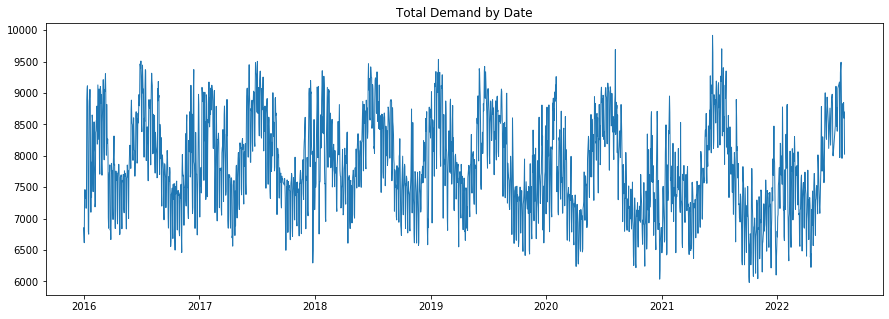

In [136]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Demand, linewidth=1)
ax.set_title("Total Demand by Date")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show() 

#### Price by Date

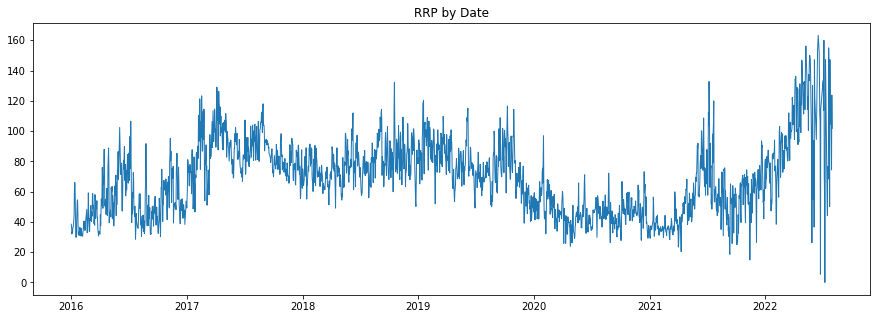

In [137]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, RRP, linewidth=1)
ax.set_title("RRP by Date")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show() 

#### Temperature by Date

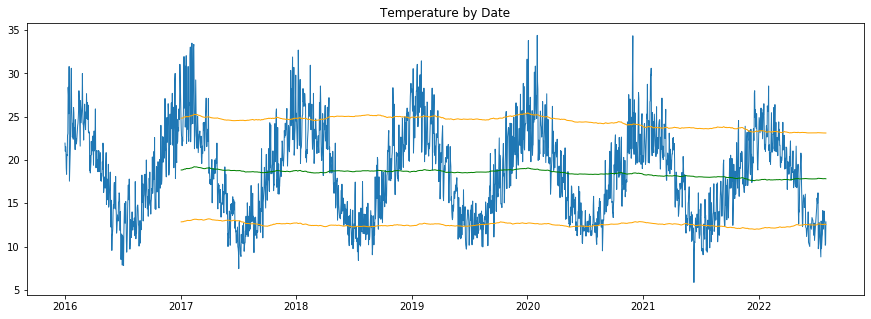

17.6041095890411 19.22027397260275
11.980547945205508 13.199452054794529
23.107397260274 25.43753424657536


In [138]:
fig, ax = plt.subplots(figsize=(15,5))
MaxTempRolling = MaxTemp.rolling(365).mean()
MinTempRolling = MinTemp.rolling(365).mean()
TempRolling = Temp.rolling(365).mean()
ax.plot(Date, Temp, linewidth=1)
ax.plot(Date, MinTempRolling, linewidth=1, color="orange")
ax.plot(Date, MaxTempRolling, linewidth=1, color="orange")
ax.plot(Date, TempRolling, linewidth=1, color="green")
ax.set_title("Temperature by Date")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()
print(TempRolling.min(), TempRolling.max())
print(MinTempRolling.min(), MinTempRolling.max())
print(MaxTempRolling.min(), MaxTempRolling.max())

#### Solar Exposure by Date

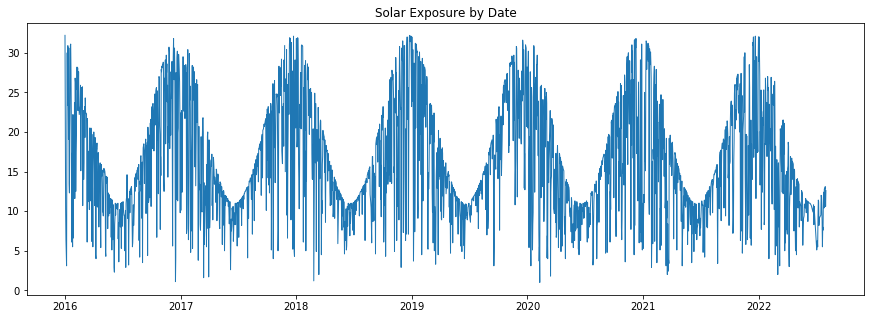

In [139]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Solar, linewidth=1)
ax.set_title("Solar Exposure by Date")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

#### Solar Output by Date

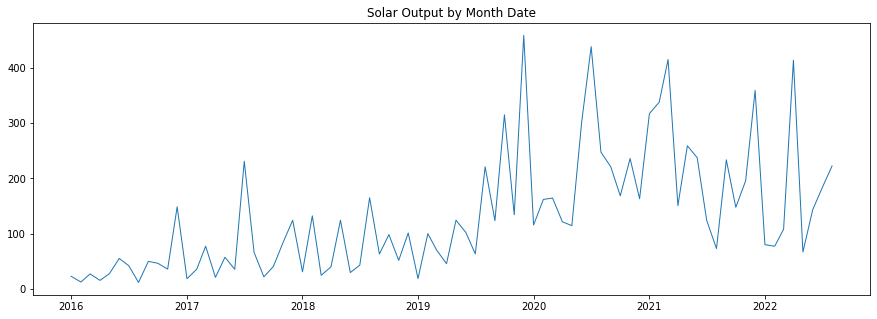

In [140]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df.MONTHDATE, Output, linewidth=1)
ax.set_title("Solar Output by Month Date")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

#### Humidity by Date

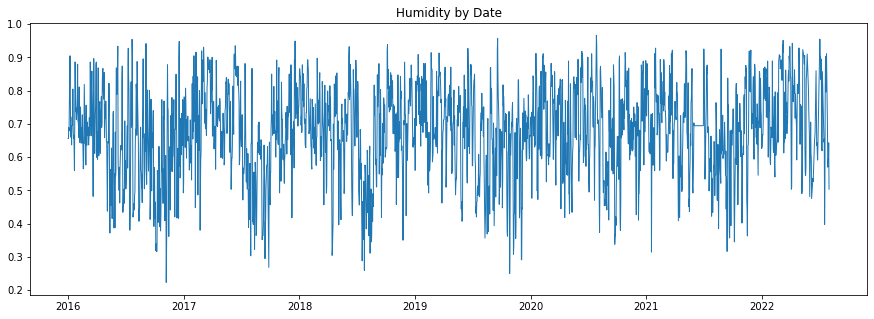

In [141]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Humidity, linewidth=1)
ax.set_title("Humidity by Date")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

#### Windspeed by Date

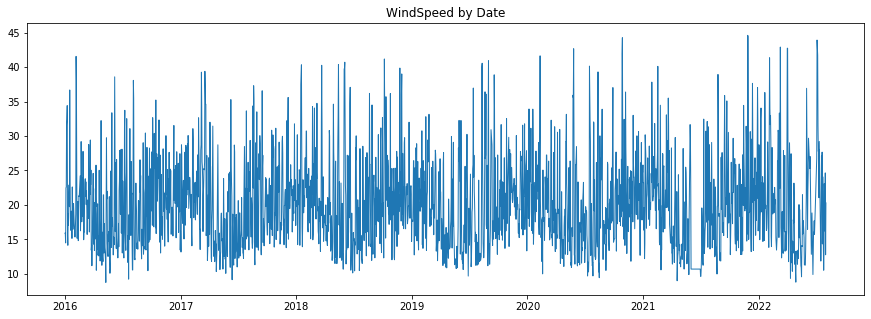

In [142]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, WindSpeed, linewidth=1)
ax.set_title("WindSpeed by Date")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

### Correlation Analysis

In [143]:
df_cor = df_lim.copy()
df_cor = df_cor[df_cor.DATE >= dt.date(2021, 8, 1)]
df_cor["QUARTER"] = df_cor['DATE'].dt.quarter
df_cor["HALF"] = np.where((df_cor['QUARTER']==1) | (df_cor['QUARTER']==4), 1, 0)
df_cor.head()

,YEAR,MONTH,DAY,HUMIDITY,WINDSPEED,DATE,TOTALDEMAND,HOLIDAY,MIN,MAX,SOLAR,TEMPAVE,RRP,FORECASTDEMAND,OUTPUT,MONTHDATE,WEEKDAY,WEEKEND,QUARTER,HALF
2021,2021,8,1,0.574894,23.255319,2021-08-01,7335.822396,0.0,9.0,24.6,9.5,16.80,47.296000,7513.042369,73.48,2021-08-01,6,1,3,0
2022,2021,8,2,0.574894,23.255319,2021-08-02,8101.526979,2.0,4.4,19.4,12.3,11.90,55.460417,8327.524223,73.48,2021-08-01,0,0,3,0
2023,2021,8,3,0.647174,17.065217,2021-08-03,8077.243715,0.0,10.0,20.2,13.2,15.10,44.100417,8331.968164,73.48,2021-08-01,1,0,3,0
2024,2021,8,4,0.602083,22.562500,2021-08-04,8461.227500,0.0,5.1,16.0,13.6,10.55,58.249787,8662.525274,73.48,2021-08-01,2,0,3,0
2025,2021,8,5,0.484889,29.066667,2021-08-05,8231.809201,0.0,6.4,19.2,13.8,12.80,46.115417,8467.645334,73.48,2021-08-01,3,0,3,0


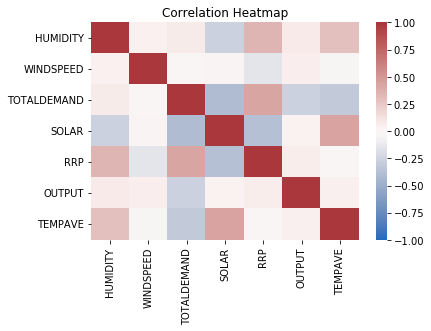

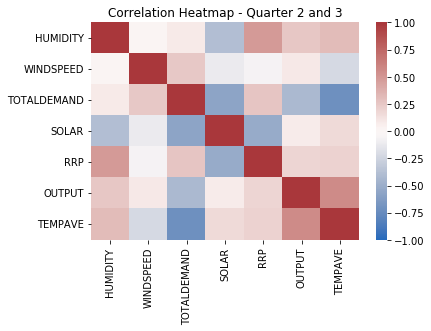

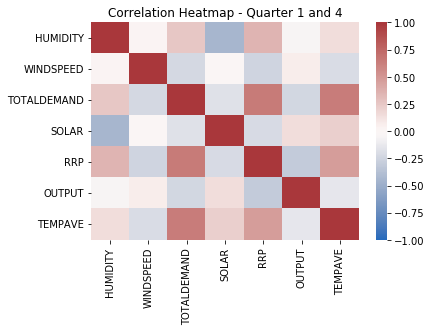

In [150]:
heatmap = sns.heatmap(
    df_cor[['HUMIDITY', 'WINDSPEED', 'TOTALDEMAND', 'SOLAR', 'RRP', 'OUTPUT', 'TEMPAVE']].corr(), 
    cmap="vlag", vmin=-1, vmax=1
)
heatmap.set_title('Correlation Heatmap')
plt.show()

# plt.figure(figsize=(10, 8))
df_cor0 = df_cor[df_cor["HALF"]==0]
heatmap = sns.heatmap(
    df_cor0[['HUMIDITY', 'WINDSPEED', 'TOTALDEMAND', 'SOLAR', 'RRP', 'OUTPUT', 'TEMPAVE']].corr(), 
    cmap="vlag", vmin=-1, vmax=1
)
heatmap.set_title('Correlation Heatmap - Quarter 2 and 3')
plt.show()

# plt.figure(figsize=(10, 8))
df_cor1 = df_cor[df_cor["HALF"]==1]
heatmap = sns.heatmap(
    df_cor1[['HUMIDITY', 'WINDSPEED', 'TOTALDEMAND', 'SOLAR', 'RRP', 'OUTPUT', 'TEMPAVE']].corr(), 
    cmap="vlag", vmin=-1, vmax=1
)
heatmap.set_title('Correlation Heatmap - Quarter 1 and 4')
plt.show()

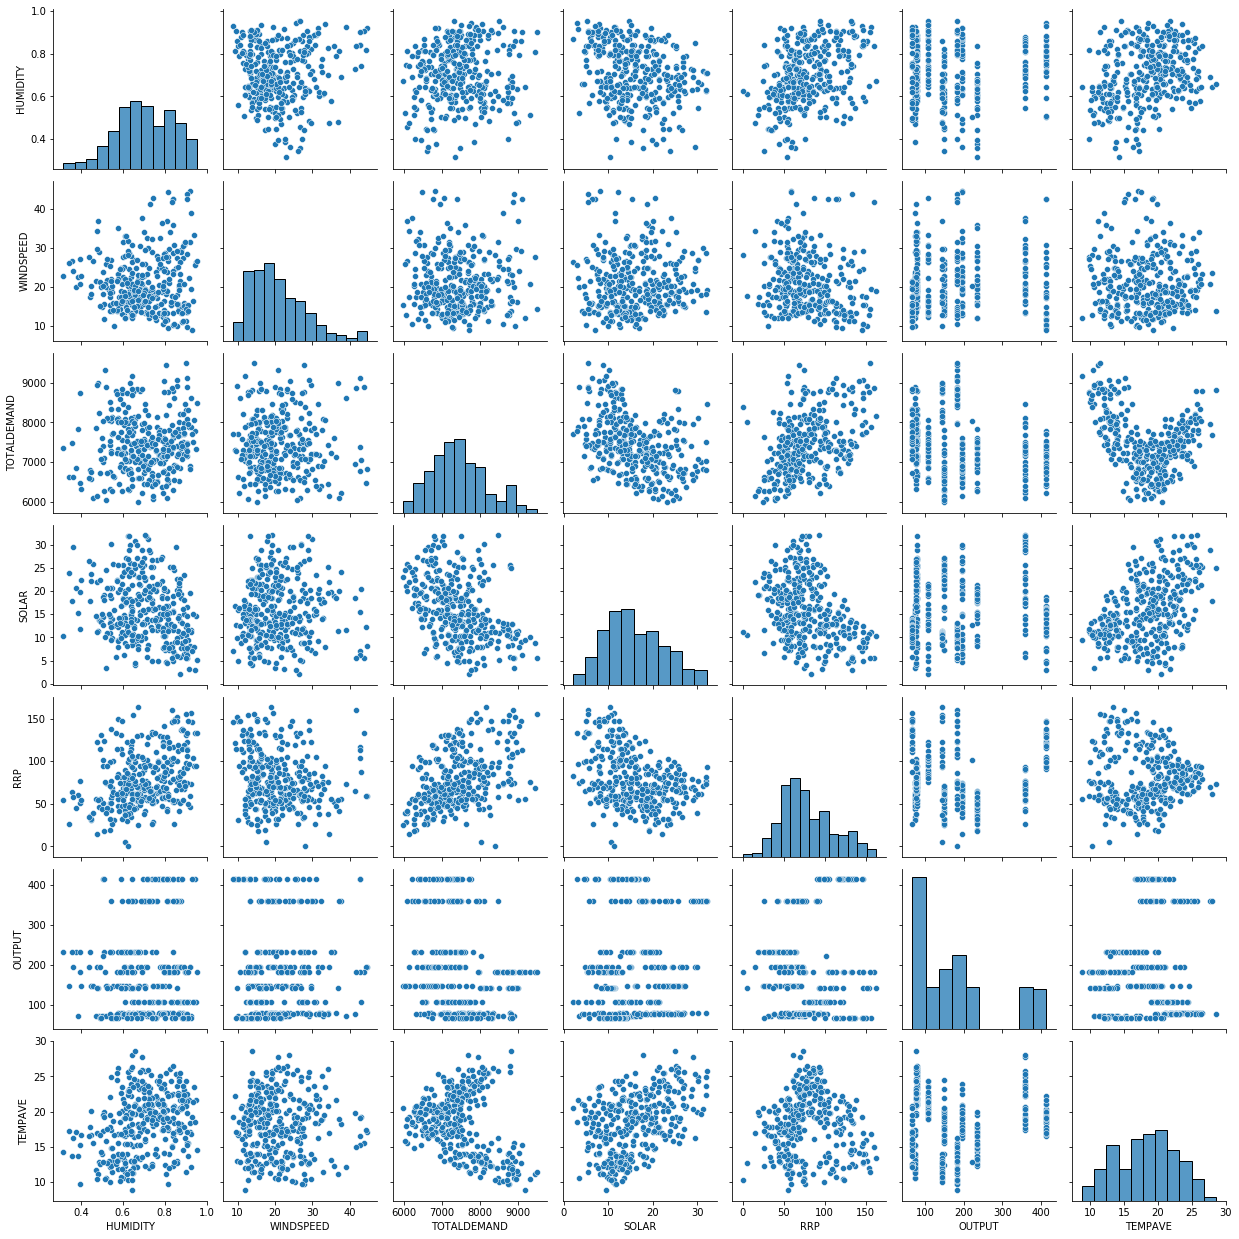

In [146]:
sns.pairplot(data=df_cor[['HUMIDITY', 'WINDSPEED', 'TOTALDEMAND', 'SOLAR', 'RRP', 'OUTPUT', 'TEMPAVE']])
plt.show()

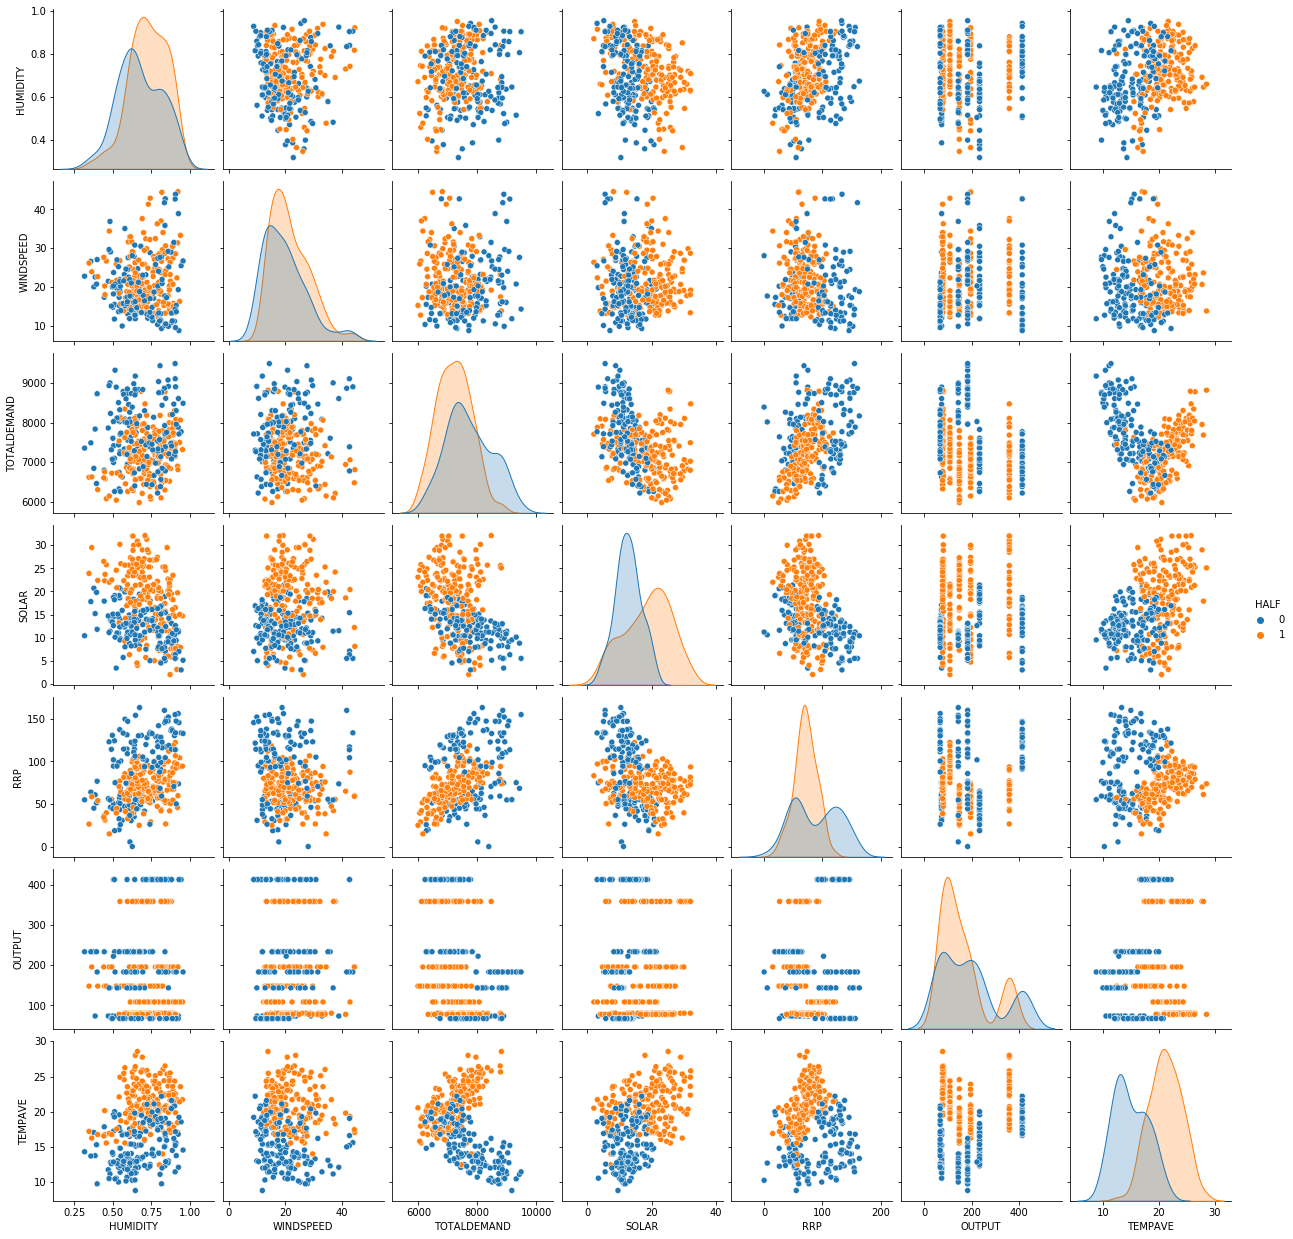

In [145]:
sns.pairplot(
    data=df_cor[['HUMIDITY', 'WINDSPEED', 'TOTALDEMAND', 'SOLAR', 'RRP', 'OUTPUT', 'TEMPAVE', "HALF"]], 
    hue="HALF"
)
plt.show()

### Outlier Analysis

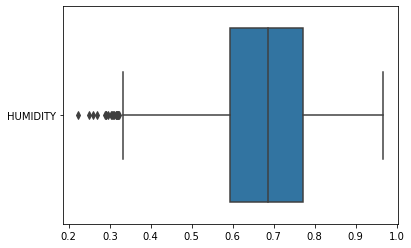

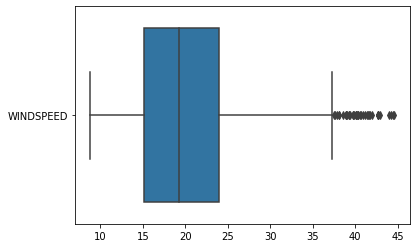

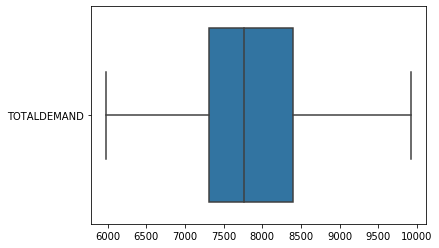

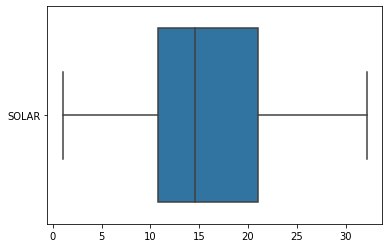

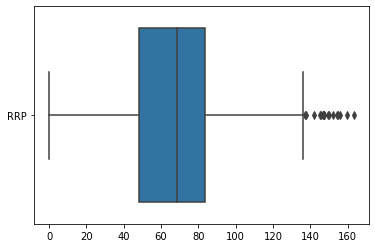

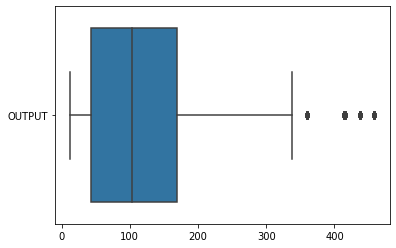

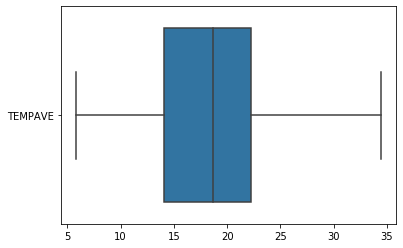

In [124]:
df_box = df_lim[cols]
for col in df_box.columns:
    sns.boxplot(data=df_box[[col]], orient="h")
    plt.show() 